#### Portals

In [ ]:
from credential import credential

cred_agol, cred_prod, cred_hom = credential('C:/Users/96328576749/Documents/_2023/arcgis_contas/arcgis_credential.json')

In [ ]:
# https://developers.arcgis.com/python/guide/cloning-content/
from arcgis.gis import GIS
portal = lambda cred: GIS( cred.host, cred.user, cred.pwd, verify_cert=False )

portal_agol = portal( cred_agol )
#portal_prod = portal( cred_prod )
portal_hom = portal( cred_hom )

print( portal_agol, portal_hom )

#### Clone - Tutorial https://developers.arcgis.com/python/guide/cloning-content/

In [57]:
from pathlib import Path
import sys

from arcgis.gis import GIS, Item
from arcgis.env import active_gis
from arcgis.features import FeatureLayerCollection
from arcgis.mapping import WebMap

In [ ]:
# Helper functions
def get_user_items(user, portal):
    user_inventory = {}
    user_items = portal.content.search(query=f"* AND owner:{user.username}", max_items=500)
    for item in user_items:
        if item.type not in user_inventory:
            user_inventory[item.type] = [ i for i in user_items  if i.type == item.type ]
    return user_inventory

def print_user_inventory(inventory):
    for itype, ilist in inventory.items():
        try:
            print(f"{itype}\n{'-'*50}")
            for i in ilist:
                print(f"{' ':3}{i.title:50}")
            print("\n")
        except Exception as e:
            print(f"\t\tOperation failed on: {i.title}")
            print(f"\t\tException: {sys.exc_info()[1]}")
            continue

def get_fs_webmaps(fs, inv):
    fs_webmap_inventory = {}
    fs_inv = []
    try:
        for wm in inv['Web Map']:
            if fs.id in get_layer_item_ids(wm):
                if not wm in fs_inv:
                    fs_inv.append(wm)
        fs_webmap_inventory[fs.title] = fs_inv
        return fs_webmap_inventory
    except KeyError as ke:
        pass

def get_layer_item_ids(wm):
    wmo = WebMap(wm)
    wm_id_list = []
    for layer in wmo.layers:
        try:
            fsvc = FeatureLayerCollection(layer['url'][:-1], active_gis)
            if not fsvc.properties['serviceItemId'] in wm_id_list:
                wm_id_list.append(fsvc.properties['serviceItemId'])
        except Exception as e:
            pass
    return wm_id_list

def get_dash_wm(portal, dash):
    return [portal.content.get(widget['itemId']) 
            for widget in dash.get_data()['widgets'] 
            if widget['type'] == "mapWidget"]


In [38]:
contents = portal_hom.content.search( query='', item_type='Dashboard')

<Item title:"Externo - Dashboard Queima Prescrita e Controlada" type:Dashboard owner:96328576749>
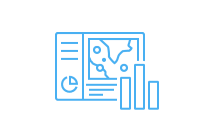

In [43]:
dash = contents[5]
dash

<Item title:"Externo - Queima Prescrita e Controlada" type:Web Map owner:96328576749>
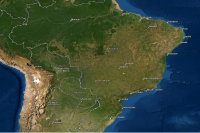

In [54]:
# Adaptation
def get_dash_wm(portal, dash):
    return [portal.content.get(widget['itemId']) 
            for widget in dash.get_data()['widgets'] 
            if widget['type'] == "mapWidget"]

wm_item = get_dash_wm( portal_hom, dash)[0]
wm_item

In [56]:
from arcgis.mapping import WebMap

WebMap(wm_item)


MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

#### Clone - Outros

In [ ]:
cloned_items = portal_agol.content.clone_items(items=[contents[0]], copy_data=False)

In [ ]:
owner = 'prevfogo.adm'
owner_contents = portal_prod.content.search( f"owner:{owner}", max_items=50 ) # total = 47 (28/06/2023)

In [ ]:
owner_contents[-2]

In [ ]:
qc_contents[:2]

In [ ]:
qc_contents = [item for item in owner_contents if item.type == 'QuickCapture Project']
qc_contents

In [ ]:
# sucesso em 30/06/2023

# cloned_items = portal_hom.content.clone_items(items=[qc_contents[2]], folder='producao', copy_data=False)  # Combate OK
#cloned_items = portal_hom.content.clone_items(items=[qc_contents[1]], folder='producao', copy_data=False) # Recuperação OK
#cloned_items = portal_hom.content.clone_items(items=[qc_contents[0]], folder='producao', copy_data=False) # Prevenção ?

In [ ]:
#dir(portal_hom.users)
user_pedro = '01138124184'
users = portal_hom.users.search()

In [ ]:
#dir(users[0])
user = users[0]

In [ ]:
#dir(user)
user.idpUsername

In [ ]:
user_pedro in [ item.idpUsername for item in users]

In [ ]:
# Find folder 'producao'
folder_search = 'producao'
me = portal_hom.users.me
folder_prod = None
for folder in me.folders:
    if folder['title'] == folder_search:
        folder_prod = folder
        exit
